In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv('NewCopy15cleanCarsCopy1df_filtered.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,Company Names,Cars Names,Engines,Capacity,HorsePower,Total Speed,Performance,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990,963.0,340,2.5,1100000.0,Hybrid,2,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749,563.0,250,5.3,460000.0,Petrol,5,900.0
2,Ford,KA+,1.2L Petrol,1200,77.5,165,10.5,13500.0,Petrol,5,120.0
3,MERCEDES,GT 63 S,V8,3982,630.0,250,3.2,161000.0,Petrol,4,900.0
4,AUDI,AUDI R8 Gt,V10,5204,602.0,320,3.6,253290.0,Petrol,2,560.0


In [5]:
df.shape

(1007, 11)

In [6]:
df.isna().sum()

Company Names    0
Cars Names       0
Engines          0
Capacity         0
HorsePower       0
Total Speed      0
Performance      0
Cars Prices      0
Fuel Types       0
Seats            0
Torque           0
dtype: int64

In [7]:
# Select categorical columns (object or string types)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Print unique categories for each column
for col in cat_cols:
    print(f"\n Column: {col}")
    print(df[col].unique().tolist())   # convert numpy array to list for readability
    print(f"Total unique categories: {df[col].nunique()}")


 Column: Company Names
['FERRARI', 'ROLLS ROYCE', 'Ford', 'MERCEDES', 'AUDI', 'BMW', 'ASTON MARTIN', 'BENTLEY', 'LAMBORGHINI', 'TOYOTA', 'NISSAN', 'ROLLS ROYCE ', 'KIA', 'HONDA', 'KIA  ', 'HYUNDAI', 'MAHINDRA', 'MARUTI SUZUKI', 'Volkswagen', 'Nissan', 'Porsche', 'Cadillac', 'Tata Motors', 'Jeep', 'Mazda', 'Chevrolet', 'GMC', 'Kia', 'Bugatti', 'Volvo', 'Jaguar Land Rover', 'Acura', 'Peugeot', 'Mitsubishi', 'Toyota']
Total unique categories: 35

 Column: Cars Names
['SF90 STRADALE', 'PHANTOM', 'KA+', ' GT 63 S', 'AUDI R8 Gt', 'Mclaren 720s', 'VANTAGE F1', 'Continental GT Azure', 'VENENO ROADSTER', 'F8 TRIBUTO', '812 GTS', 'PORTOFINO', 'ROMA', 'MONZA SP2', 'F8 SPIDER', 'PORTOFINO M', 'ROMA SPIDER', 'GR SUPRA', 'TOYOTA 86', 'TOYOTA  GR86', 'TOYOTA LAND CRUISER', 'TOYOTA SEQUOIA', 'GT-R', '370Z', 'Z PROTO', 'ALTIMA', 'MAXIMA', 'SENTRA', 'ROGUE', 'PATHFINDER', 'FRONTIER', 'TITAN', 'VALKYRIE', 'VALHALLA', 'DBS SUPERLEGGERA', 'DB11', 'VANTAGE ', 'DBX', 'RAPIDE AMR', 'VANQUISH', 'LAGONDA TARAF

In [8]:
####label-encoding

In [9]:
# Encode categorical variables
cat_cols = ["Company Names", "Cars Names", "Engines", "Fuel Types"]
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [10]:
df.head()

,Company Names,Cars Names,Engines,Capacity,HorsePower,Total Speed,Performance,Cars Prices,Fuel Types,Seats,Torque
0,8,724,266,3990,963.0,340,2.5,1100000.0,2,2,800.0
1,28,594,259,6749,563.0,250,5.3,460000.0,4,5,900.0
2,9,493,17,1200,77.5,165,10.5,13500.0,4,5,120.0
3,21,0,266,3982,630.0,250,3.2,161000.0,4,4,900.0
4,1,126,258,5204,602.0,320,3.6,253290.0,4,2,560.0


In [11]:
# Select categorical columns (object or string types)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Print unique categories for each column
for col in cat_cols:
    print(f"\n Column: {col}")
    print(df[col].unique().tolist())   # convert numpy array to list for readability
    print(f"Total unique categories: {df[col].nunique()}")

In [12]:
df[col].unique()

array([2, 4, 1, 3, 0])

In [13]:
# Features and target
X = df.drop("Cars Prices", axis=1)
y = df["Cars Prices"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 1. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
# 2. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# 3. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [17]:
#### one-hot encoding

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define categorical columns
cat_cols = ["Company Names", "Cars Names", "Engines", "Fuel Types"]

# Preprocessing: OneHotEncoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"  # Keep the other (numeric) columns as is
)

# Now you can create pipelines for each model

# 1. Decision Tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])
dt_pipeline.fit(X_train, y_train)

# 2. Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# 3. Gradient Boosting
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Names',
                                                   'Cars Names', 'Engines',
                                                   'Fuel Types'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the pipeline models
models = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

# Evaluate each model
for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", mean_squared_error(y_test, preds, squared=False))
    print("R2 Score:", r2_score(y_test, preds))



Decision Tree Performance:
MAE: 50688.66831683168
RMSE: 395386.20716345677
R2 Score: 0.6887361960745193

Random Forest Performance:
MAE: 62376.42625412542
RMSE: 371426.5507660978
R2 Score: 0.7253171903843478

Gradient Boosting Performance:
MAE: 78106.643683269
RMSE: 423696.18040786264
R2 Score: 0.6425669655083293


In [20]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [100, 200, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="r2"
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Best R2 Score: 0.5849251746784466


In [21]:
#Model Evaluation with Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring="r2")
print("Cross-validated R2:", scores.mean())


Cross-validated R2: 0.2567600191735243


In [22]:
#Feature Importance
import pandas as pd

# Extract the trained model inside the pipeline
rf_model = rf_pipeline.named_steps["model"]

# One-hot encoder feature names
ohe = rf_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(cat_cols)
all_features = list(feature_names) + [col for col in X.columns if col not in cat_cols]

# Feature importances
importances = rf_model.feature_importances_
feat_importances = pd.DataFrame({"Feature": all_features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

print(feat_importances.head(10))


              Feature  Importance
427    Cars Names_499    0.389224
1076      Total Speed    0.289693
1075       HorsePower    0.130565
1078            Seats    0.049843
100     Cars Names_82    0.031948
958       Engines_148    0.021160
5     Company Names_5    0.020624
1036      Engines_233    0.017629
1074         Capacity    0.007806
292    Cars Names_328    0.006878


In [23]:
# ColumnTransformer to OneHotEncode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ],
    remainder="passthrough"
)


In [24]:
from sklearn.linear_model import BayesianRidge

# Bayesian Ridge Regression pipeline
br_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", BayesianRidge())
])

# Fit on training data
br_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company Names',
                                                   'Cars Names', 'Engines',
                                                   'Fuel Types'])])),
                ('model', BayesianRidge())])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline,
    "Bayesian Ridge": br_pipeline
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", mean_squared_error(y_test, preds, squared=False))
    print("R2 Score:", r2_score(y_test, preds))



Decision Tree Performance:
MAE: 50688.66831683168
RMSE: 395386.20716345677
R2 Score: 0.6887361960745193

Random Forest Performance:
MAE: 62376.42625412542
RMSE: 371426.5507660978
R2 Score: 0.7253171903843478

Gradient Boosting Performance:
MAE: 78106.643683269
RMSE: 423696.18040786264
R2 Score: 0.6425669655083293

Bayesian Ridge Performance:
MAE: 163859.3333934046
RMSE: 359581.40901339834
R2 Score: 0.7425576150312256


Columns found: ['Company Names', 'Cars Names', 'Engines', 'Capacity', 'HorsePower', 'Total Speed', 'Performance', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque']

=== Decision Tree — Test Performance (raw) ===
R²:   0.7829
MAE:  50,304
RMSE: 330,243


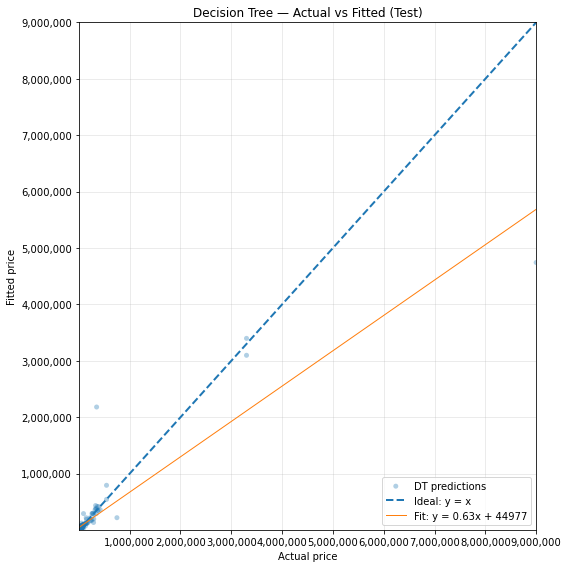

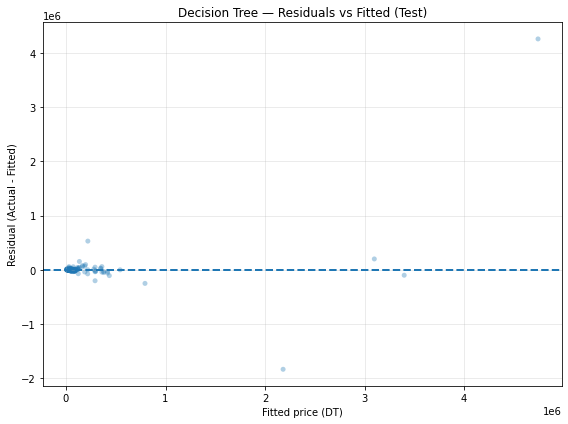

In [28]:
# === Decision Tree: Actual vs Fitted (with safe back-transform) ===
import re
import numpy as np
import pandas as pd
import unicodedata as ud
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------- 1) CONFIG ----------
file_path = "NewCopy15cleanCarsCopy1df_filtered.csv"
text_cols = ["Company Names", "Cars Names", "Fuel Types"]
num_cols  = ["HorsePower", "Total Speed", "Seats"]
target    = "Cars Prices"

# ---------- 2) LOAD & CLEAN ----------
def _clean_col(s: str) -> str:
    s = ud.normalize("NFKC", str(s))
    s = s.replace("\ufeff", "").replace("\u200b", "").replace("\u200c", "").replace("\u200d", "")
    return " ".join(s.strip().split())

def to_number(series: pd.Series) -> pd.Series:
    # e.g. "220 km/h" -> 220 ; "150 hp" -> 150 ; "1,234" -> 1234
    return pd.to_numeric(series.astype(str).str.replace(r"[^\d.]+", "", regex=True), errors="coerce")

df = pd.read_csv(file_path, encoding="utf-8-sig", thousands=",")
df.columns = [_clean_col(c) for c in df.columns]

# coerce numerics
if target not in df.columns:
    raise KeyError(f"Missing target column: {target}")
df[target] = to_number(df[target])

for c in ["HorsePower", "Total Speed", "Seats"]:
    if c in df.columns:
        # Seats is often already numeric; to_number is robust either way
        df[c] = to_number(df[c])

# keep only rows with price
df = df.dropna(subset=[target]).reset_index(drop=True)

# sanity: ensure required columns exist
missing = set(text_cols + num_cols + [target]) - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

print("Columns found:", list(df.columns))

# ---------- 3) FEATURES & SPLIT ----------
def combine_text(X):
    """Combine selected text columns into a single string per row."""
    if isinstance(X, pd.DataFrame):
        return (X.astype(str).agg(" ".join, axis=1)).to_numpy()
    return (pd.DataFrame(X).astype(str).agg(" ".join, axis=1)).to_numpy()

X = df[text_cols + num_cols]
y = np.log1p(df[target])  # log target for stability

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ---------- 4) PREPROCESSING ----------
# Trees don't like huge sparse TF-IDF matrices; compress with SVD to a dense, compact set.
text_pipe = Pipeline(steps=[
    ("combine", FunctionTransformer(combine_text, validate=False)),
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        ngram_range=(1, 2),
        min_df=3,
        max_features=30000,
        token_pattern=r"(?u)\b[\w\.-]+\b"
    )),
    ("svd", TruncatedSVD(n_components=100, random_state=42))   # try 50 if you see overfitting
])

num_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="median")),                 # scaling not needed for trees
])

pre = ColumnTransformer([
    ("text", text_pipe, text_cols),
    ("num",  num_pipe,  num_cols),
])

# ---------- 5) MODEL ----------
dt = DecisionTreeRegressor(
    max_depth=20,        # tune: lower (e.g., 16) if overfitting / wild preds
    min_samples_leaf=2,  # small regularization
    random_state=42
)

dt_model = Pipeline([
    ("pre", pre),
    ("dt", dt)
])

# ---------- 6) FIT ----------
dt_model.fit(X_train, y_train)

# ---------- 7) PREDICT (safe back-transform) ----------
def safe_expm1(a, clip=30.0):
    """Exponential with clipping in log-space to avoid overflow to inf."""
    a = np.asarray(a, dtype=float)
    a = np.clip(a, -clip, clip)  # exp(30) ~ 1.07e13
    return np.expm1(a)

y_true = np.expm1(y_test)
y_pred_log = dt_model.predict(X_test)
y_fit = safe_expm1(y_pred_log, clip=30.0)

# mask any non-finite values (just in case)
mask = np.isfinite(y_true) & np.isfinite(y_fit) & (y_true < 1e15) & (y_fit < 1e15)
dropped = int((~mask).sum())
if dropped:
    print(f"Dropped {dropped} row(s) with non-finite/overflow values for metrics/plot.")
y_true_m = y_true[mask]
y_fit_m  = y_fit[mask]

# ---------- 8) METRICS ----------
r2   = r2_score(y_true_m, y_fit_m)
mae  = mean_absolute_error(y_true_m, y_fit_m)
rmse = mean_squared_error(y_true_m, y_fit_m, squared=False)

print("\n=== Decision Tree — Test Performance (raw) ===")
print(f"R²:   {r2:.4f}")
print(f"MAE:  {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")

# ---------- 9) PLOTS ----------
# Actual vs Fitted
mn = float(np.nanmin([y_true_m.min(), y_fit_m.min()]))
mx = float(np.nanmax([y_true_m.max(), y_fit_m.max()]))

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_true_m, y_fit_m, alpha=0.35, s=25, edgecolor="none", label="DT predictions")
ax.plot([mn, mx], [mn, mx], linestyle="--", linewidth=2, label="Ideal: y = x")

# simple linear fit to visualize bias
m, b = np.polyfit(y_true_m, y_fit_m, 1)
ax.plot([mn, mx], [m*mn + b, m*mx + b], linewidth=1, label=f"Fit: y = {m:.2f}x + {b:.0f}")

ax.set_xlim(mn, mx); ax.set_ylim(mn, mx)
ax.set_xlabel("Actual price"); ax.set_ylabel("Fitted price")
ax.set_title("Decision Tree — Actual vs Fitted (Test)")

fmt = FuncFormatter(lambda x, _ : f"{x:,.0f}")
ax.xaxis.set_major_formatter(fmt); ax.yaxis.set_major_formatter(fmt)

ax.grid(True, alpha=0.3)
ax.legend(loc="lower right")  # bottom-right legend

# metrics box
# ax.text(
#     0.02, 0.98,
#     f"R² = {r2:.3f}\nMAE = {mae:,.0f}\nRMSE = {rmse:,.0f}",
#     transform=ax.transAxes, va="top", ha="left",
#     bbox=dict(boxstyle="round", facecolor="white", alpha=0.85, edgecolor="none")
# )

plt.tight_layout()
# plt.savefig("dt_actual_vs_fitted_test.png", dpi=200)
plt.show()

# Residuals vs Fitted (optional)
resid = y_true_m - y_fit_m
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_fit_m, resid, alpha=0.35, s=25, edgecolor="none")
ax.axhline(0, linestyle="--", linewidth=2)
ax.set_xlabel("Fitted price (DT)")
ax.set_ylabel("Residual (Actual - Fitted)")
ax.set_title("Decision Tree — Residuals vs Fitted (Test)")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
